In [2]:
import numpy as np
import sys
from matplotlib.pyplot import plot
from matplotlib.pyplot import show

In [3]:
c = np.loadtxt('data.csv',delimiter=',',usecols=(6),unpack=True)

In [4]:
N = 5

In [5]:
b = c[-N:] #take last 5 values of close 
b = b[::-1] #reverse b
print("b is",b)

b is [351.99 346.67 352.47 355.76 355.36]


In [6]:
A = np.zeros((N,N),float)
print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
#set values for each ele,emnt in A

In [11]:
for i in range(N):
    A[i,] = c[-N-1-i: -1-i]
    


In [12]:
print(A)

[[360.   355.36 355.76 352.47 346.67]
 [359.56 360.   355.36 355.76 352.47]
 [352.12 359.56 360.   355.36 355.76]
 [349.31 352.12 359.56 360.   355.36]
 [353.21 349.31 352.12 359.56 360.  ]]


In [14]:
#deteremine coeffiecnts that satisfy liner model

(x,residuals,rank,s) = np.linalg.lstsq(A,b)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
print(x,residuals,rank,s)

[ 0.78111069 -1.44411737  1.63563225 -0.89905126  0.92009049] [] 5 [1.77736601e+03 1.49622969e+01 8.75528492e+00 5.15099261e+00
 1.75199608e+00]


In [16]:
print(np.dot(b,x))

357.93916101523365


# Trend Lines

In [17]:
h,l,c = np.loadtxt('data.csv',delimiter=',',usecols=(4,5,6),unpack=True)

In [18]:
#determine pivot as mean of h,l,c
pivot = (h+l+c)/3
print("Pivots",pivot)

Pivots [338.01       337.88666667 343.88666667 344.37333333 342.07666667
 345.57       350.92333333 354.29       357.34333333 354.18
 356.06333333 358.45666667 359.14       362.84333333 358.36333333
 353.19333333 340.57666667 341.95666667 342.13333333 347.13
 353.12666667 350.90333333 351.62333333 358.42333333 359.34666667
 356.11333333 355.13666667 352.61       347.11333333 349.77      ]


In [19]:
#define a function to fit the line

In [20]:
def fit_line(t,y):
    A = np.vstack([t,np.ones_like(t)]).T
    return(np.linalg.lstsq(A,y)[0])

In [21]:
t = np.arange(len(c))

In [22]:
sa, sb = fit_line(t, pivot-(h-l))

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
ra, rb = fit_line(t, pivot+(h-l))

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
support = sa*t +sb
resistance = ra*t+rb

In [25]:
conditions = (c>support) & (c<resistance)
print("Conditions :",conditions )

Conditions : [False False  True  True  True  True  True False False  True False False
 False False False  True False False False  True  True  True  True False
 False  True  True  True False  True]


In [27]:
between_bands = np.where(conditions)

In [28]:
print(support[between_bands])

[341.92421382 342.19081893 342.45742405 342.72402917 342.99063429
 343.79044964 345.39008034 346.4565008  346.72310592 346.98971104
 347.25631615 348.0561315  348.32273662 348.58934174 349.12255197]


In [29]:
print(c[between_bands])

[345.03 344.32 343.44 346.5  351.88 354.54 350.56 348.16 353.21 349.31
 352.12 355.36 355.76 352.47 351.99]


In [30]:
print(resistance[between_bands])

[352.61688271 352.90732765 353.19777259 353.48821753 353.77866246
 354.64999728 356.39266691 357.55444667 357.84489161 358.13533655
 358.42578149 359.2971163  359.58756124 359.87800618 360.45889606]


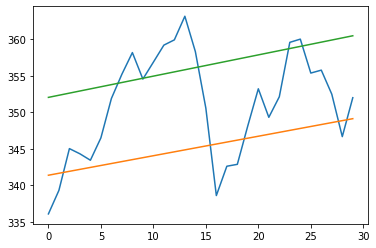

In [34]:
plot(t,c)
plot(t,support)
plot(t,resistance)
show()